In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Upload the data set
from google.colab import files
uploaded = files.upload()

Saving glass.xlsx to glass.xlsx


In [ ]:
#Reading the dataset
df = pd.read_excel('glass.xlsx',sheet_name='glass')
df.head() #Overview of the data set

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#General information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### **Overview Of The Dataset**

- The dataset consists of 214 observations/readings of different types of glass with 10 features and it's well structure with zero missing values .
- There are 10 columns consists of 9 continuous numerical variables and 1 categorical numerical variable (Type) which is also the target variable.
- It's a classification between different types of glass based on its chemical composition.

**<u>About Features</u>**

Each feature represents the weight percentage of certain chemical components found in the glass.

- Refractive Index(RI):its a measurement of how light bends when passing through the glass.
- Sodium(Na): A major component that influences glass strength and durability.
- Magnesium(Mg): Magnesium oxide/carbonate helps in reducing thermal(heat) expansion and increasing glass stability.
- Aluminum(Al): Aluminum oxide improves durability & strenth.
- Silicon(Si): The main component in formation of glass when two oxygen atoms boding with one pure silicon atom.
- Potassium(K): Potassium affects glass corbonate hardens and increases refractive properties to the glass .
- Calcium(Ca): Similar to potassium carbonate ,calcium carbonate improves hardness and stability.
- Barium(Ba):Barium carbonate enhances refractive index and density which commonly used optical glasses and certain glassware.
- Iron(Fe):Iron oxide influence in increase melting output as well as favouring in making high quality glass.

- Glass Type(Target Variable):The "Type" column represents the category of glass types,which are classified into 6 distinct groups (except class 4 which is absent in this dataset).

 - 1- Building Windows (Float Processed)
 - 2- Building Windows (Non-Float Processed)
 - 3- Vehicle Windows (Float Processed)
 - 4- Vehicle Windows (Non-Float Processed)- None in the dataset
 - 5- Containers ( bottles,jars,)
 - 6- Tableware ( dishes)
 - 7- Headlamps (Used in vehicle lighting).

### **Exploratory Data Analysis**

#### **Descriptive Statistics**

In [ ]:
#Statistical summary of the data set
basic_stats = df.describe().T
skewness = df.skew()
kurtosis = df.kurtosis()

distribution_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})
stats_table = pd.concat([basic_stats, distribution_stats], axis=1)


stats_table

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393,1.625431,4.931737
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000,0.454181,3.052232
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000,-1.152559,-0.410319
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000,0.907290,2.060569
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000,-0.730447,2.967903
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000,6.551648,54.689699
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000,2.047054,6.681978
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000,3.416425,12.541084
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000,1.754327,2.662016
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000,1.114915,-0.279518


#### **General Observations**

**<u>Refractive Index(RI)</u>**
  - The range(1.511-1.533) with std(0.003) is very small meaning the data clustered tightly.
  - Skewness(1.6) and kurtosis(4.9) suggests that distribution is moderately right skewed with sharpe peaks

**<u>Sodium(Na)</u>**
 - Date is clustered normally suggested by range(10.73-17.38) and std(0.82)
 - With skewness() and kurtosis() the distribution might normally distributed and slightly right skewed.

**<u>Magnesium(Mg)</u>**
- According to standard deviation(1.44) and mean(2.68) and after compared with range(0.00-4.49) the data distribution is seems have more high values than small values.
- The distribution is left skew and more flatter suggest by skewness(-1.15) and kurtosis(-0.41)

**<u>Aluminum(Al)</u>**
 - There are more lower values indicated by Range(0.29-3.50) and mean(1.44) and compact suggested by Std Dev(0.50)
 - Aluminum distribution is quite right skewed with slightly peaked.

**<u>Silicon(Si)</u>**
 - Main component obviously has high values but it seems there are few low values according to mean(72.65) and std(0.77).
 - since most values are high the distribution is slightly left skewed near normal distribution

**<u>Potassium(K)</u>**
- The range(0.00-6.21) is little wide but most of the values are small after understanding mean and std
- The distribution is highly skewed due to extreme outliers with very high Potassium levels.

**<u>Calcium(Ca)</u>**
- Data has big range but a lot of values(high) are above the median and has large variance between them.
- Distribution is right skewed with some peaks

**<u>Barium(Ba)</u>**
 - The range is quite big considering the values very low to zero suggested by mean(0.17) and std(0.50)
 - This is a highly right skewed distribution with some high values and very peaked because of most low to zero values.

**<u>Iron (Fe)</u>**
 - The data is compact between 0.00-0.51 with most values might be very low with mean(0.057) std Dev(0.097) being very low.
 - The distribution is right skewed with some peaks

**<u>Glass Type (Target Variable)</u>**
 - Imbalanced data with large number of values seems low favouring that some types are more common.
 - the distribution is quite right skewed and flatther than normal distribution.


#### **Data Visualization**


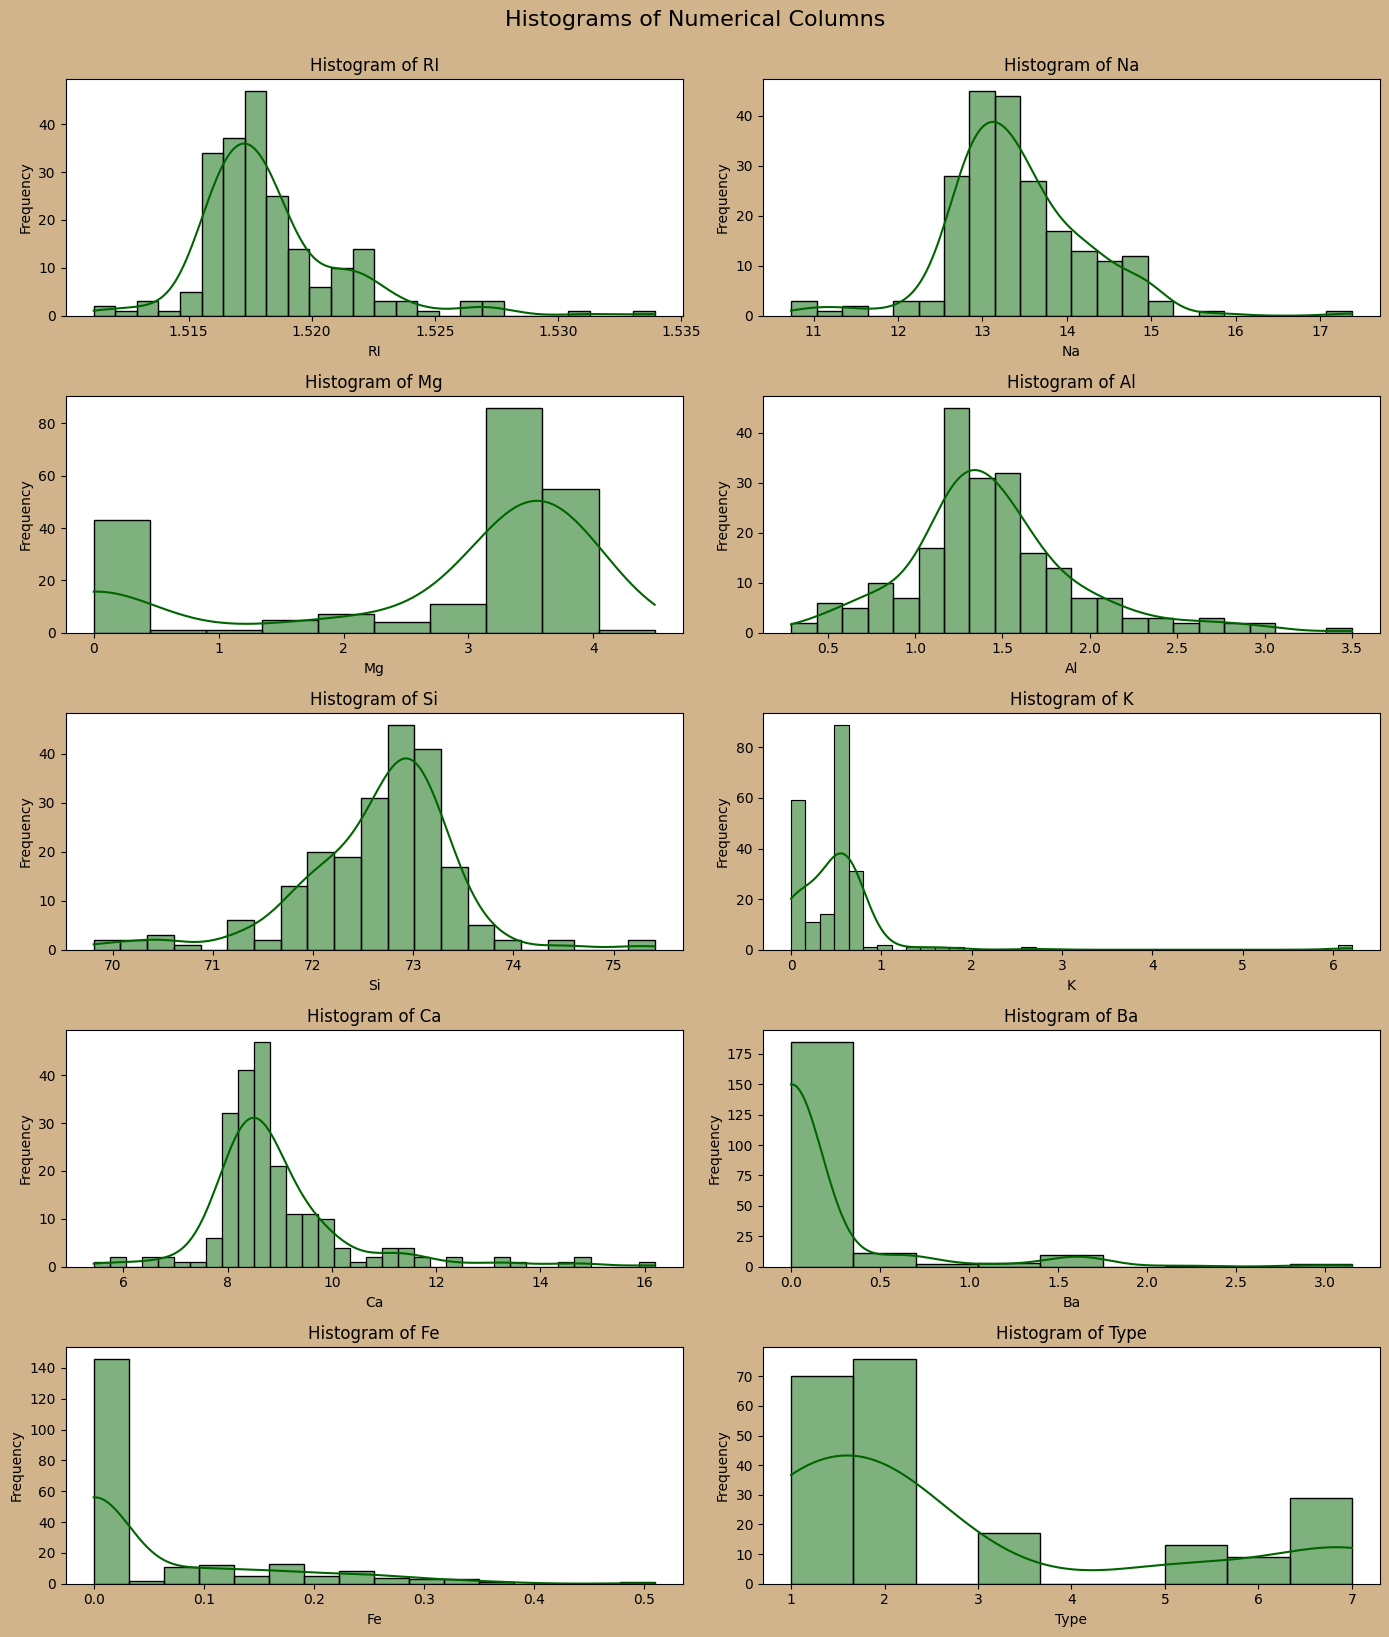

In [ ]:
#Visualizing the distributions of data values through different plots
#Histogram of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(14,16),facecolor = 'tan')
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True,bins="auto", ax=axes[i],color= 'darkgreen')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.suptitle('Histograms of Numerical Columns', y=1.02,fontsize ='16')
plt.show()

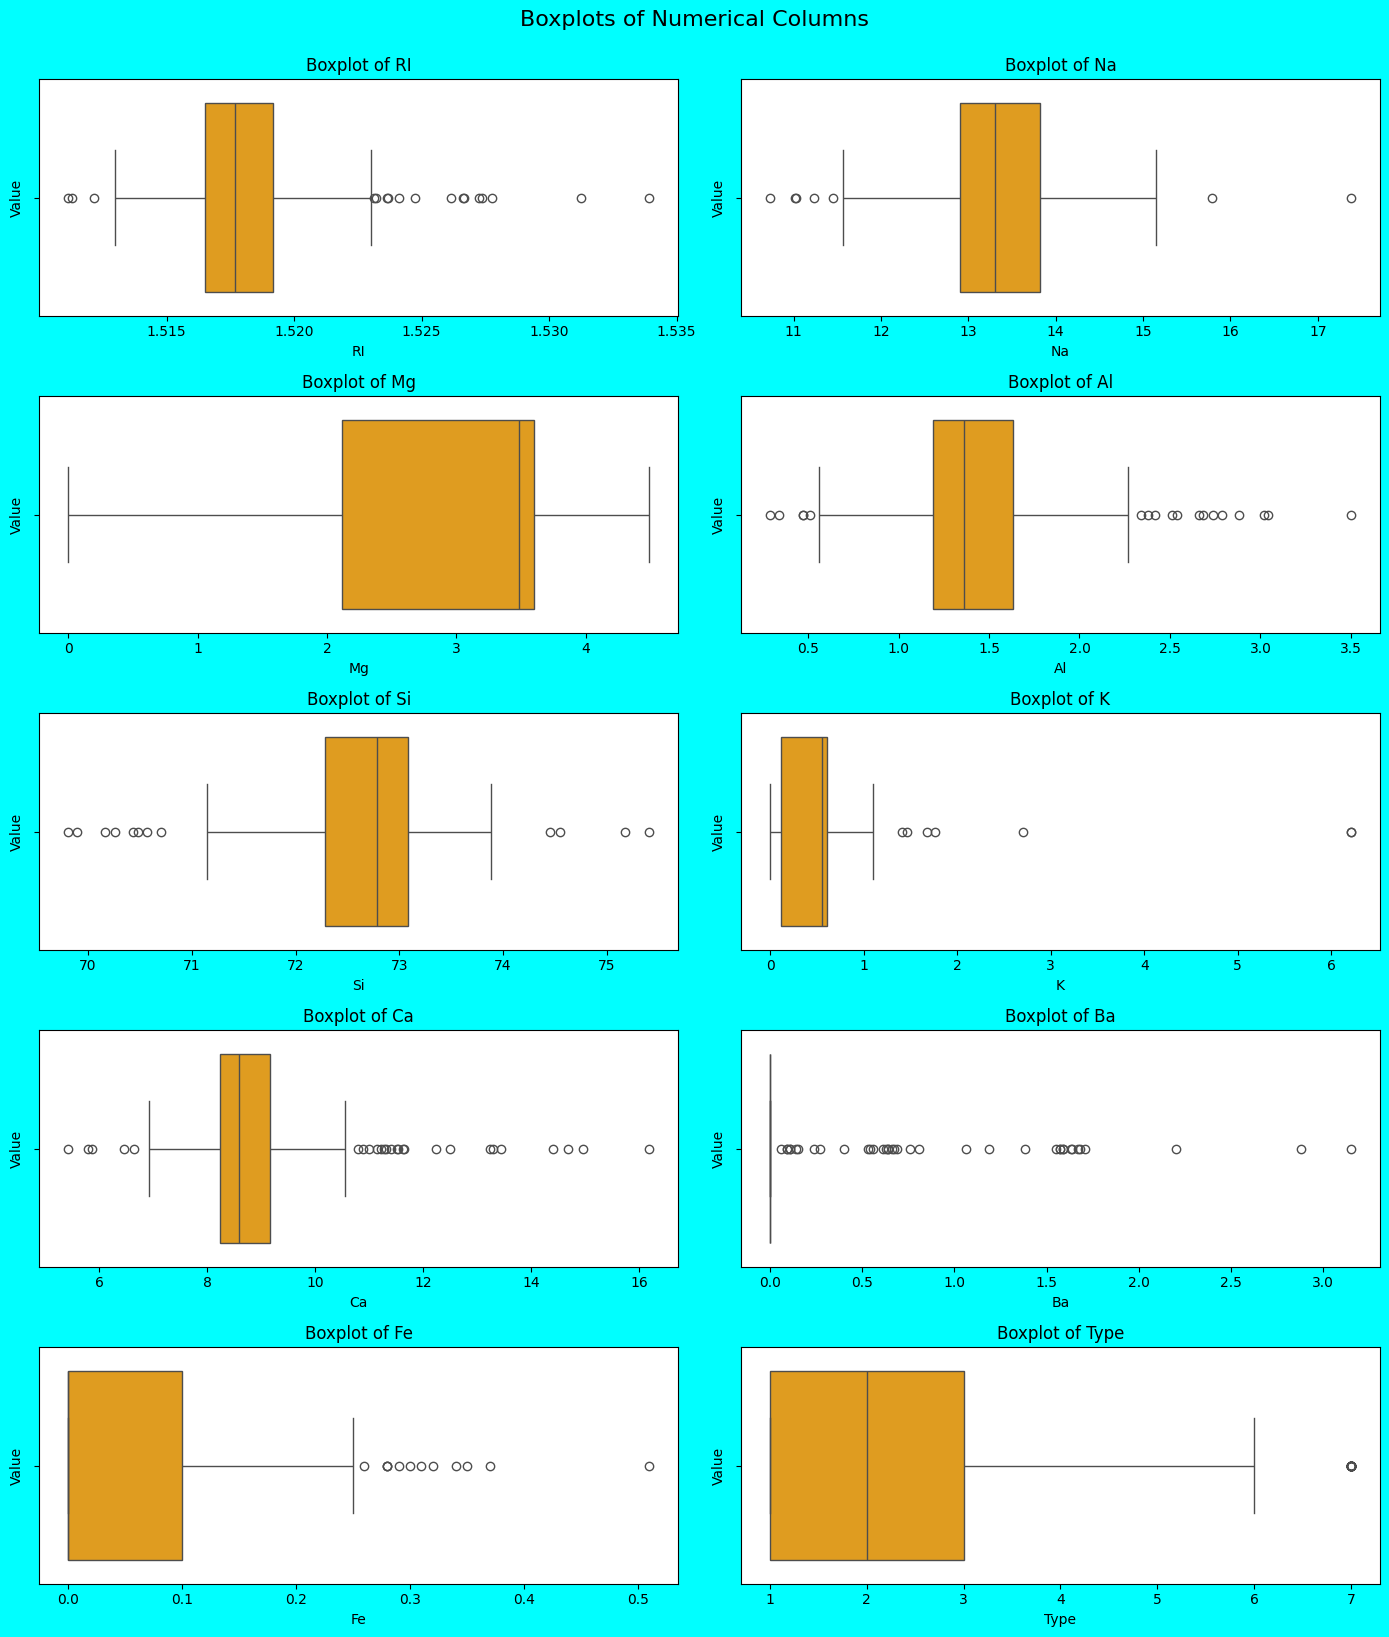

In [ ]:
#Boxplot of numerical columns
fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(14,16),facecolor = 'cyan')
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i],color= 'orange')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns', y=1.02,fontsize ='16')
plt.show()

<Figure size 1600x1200 with 0 Axes>

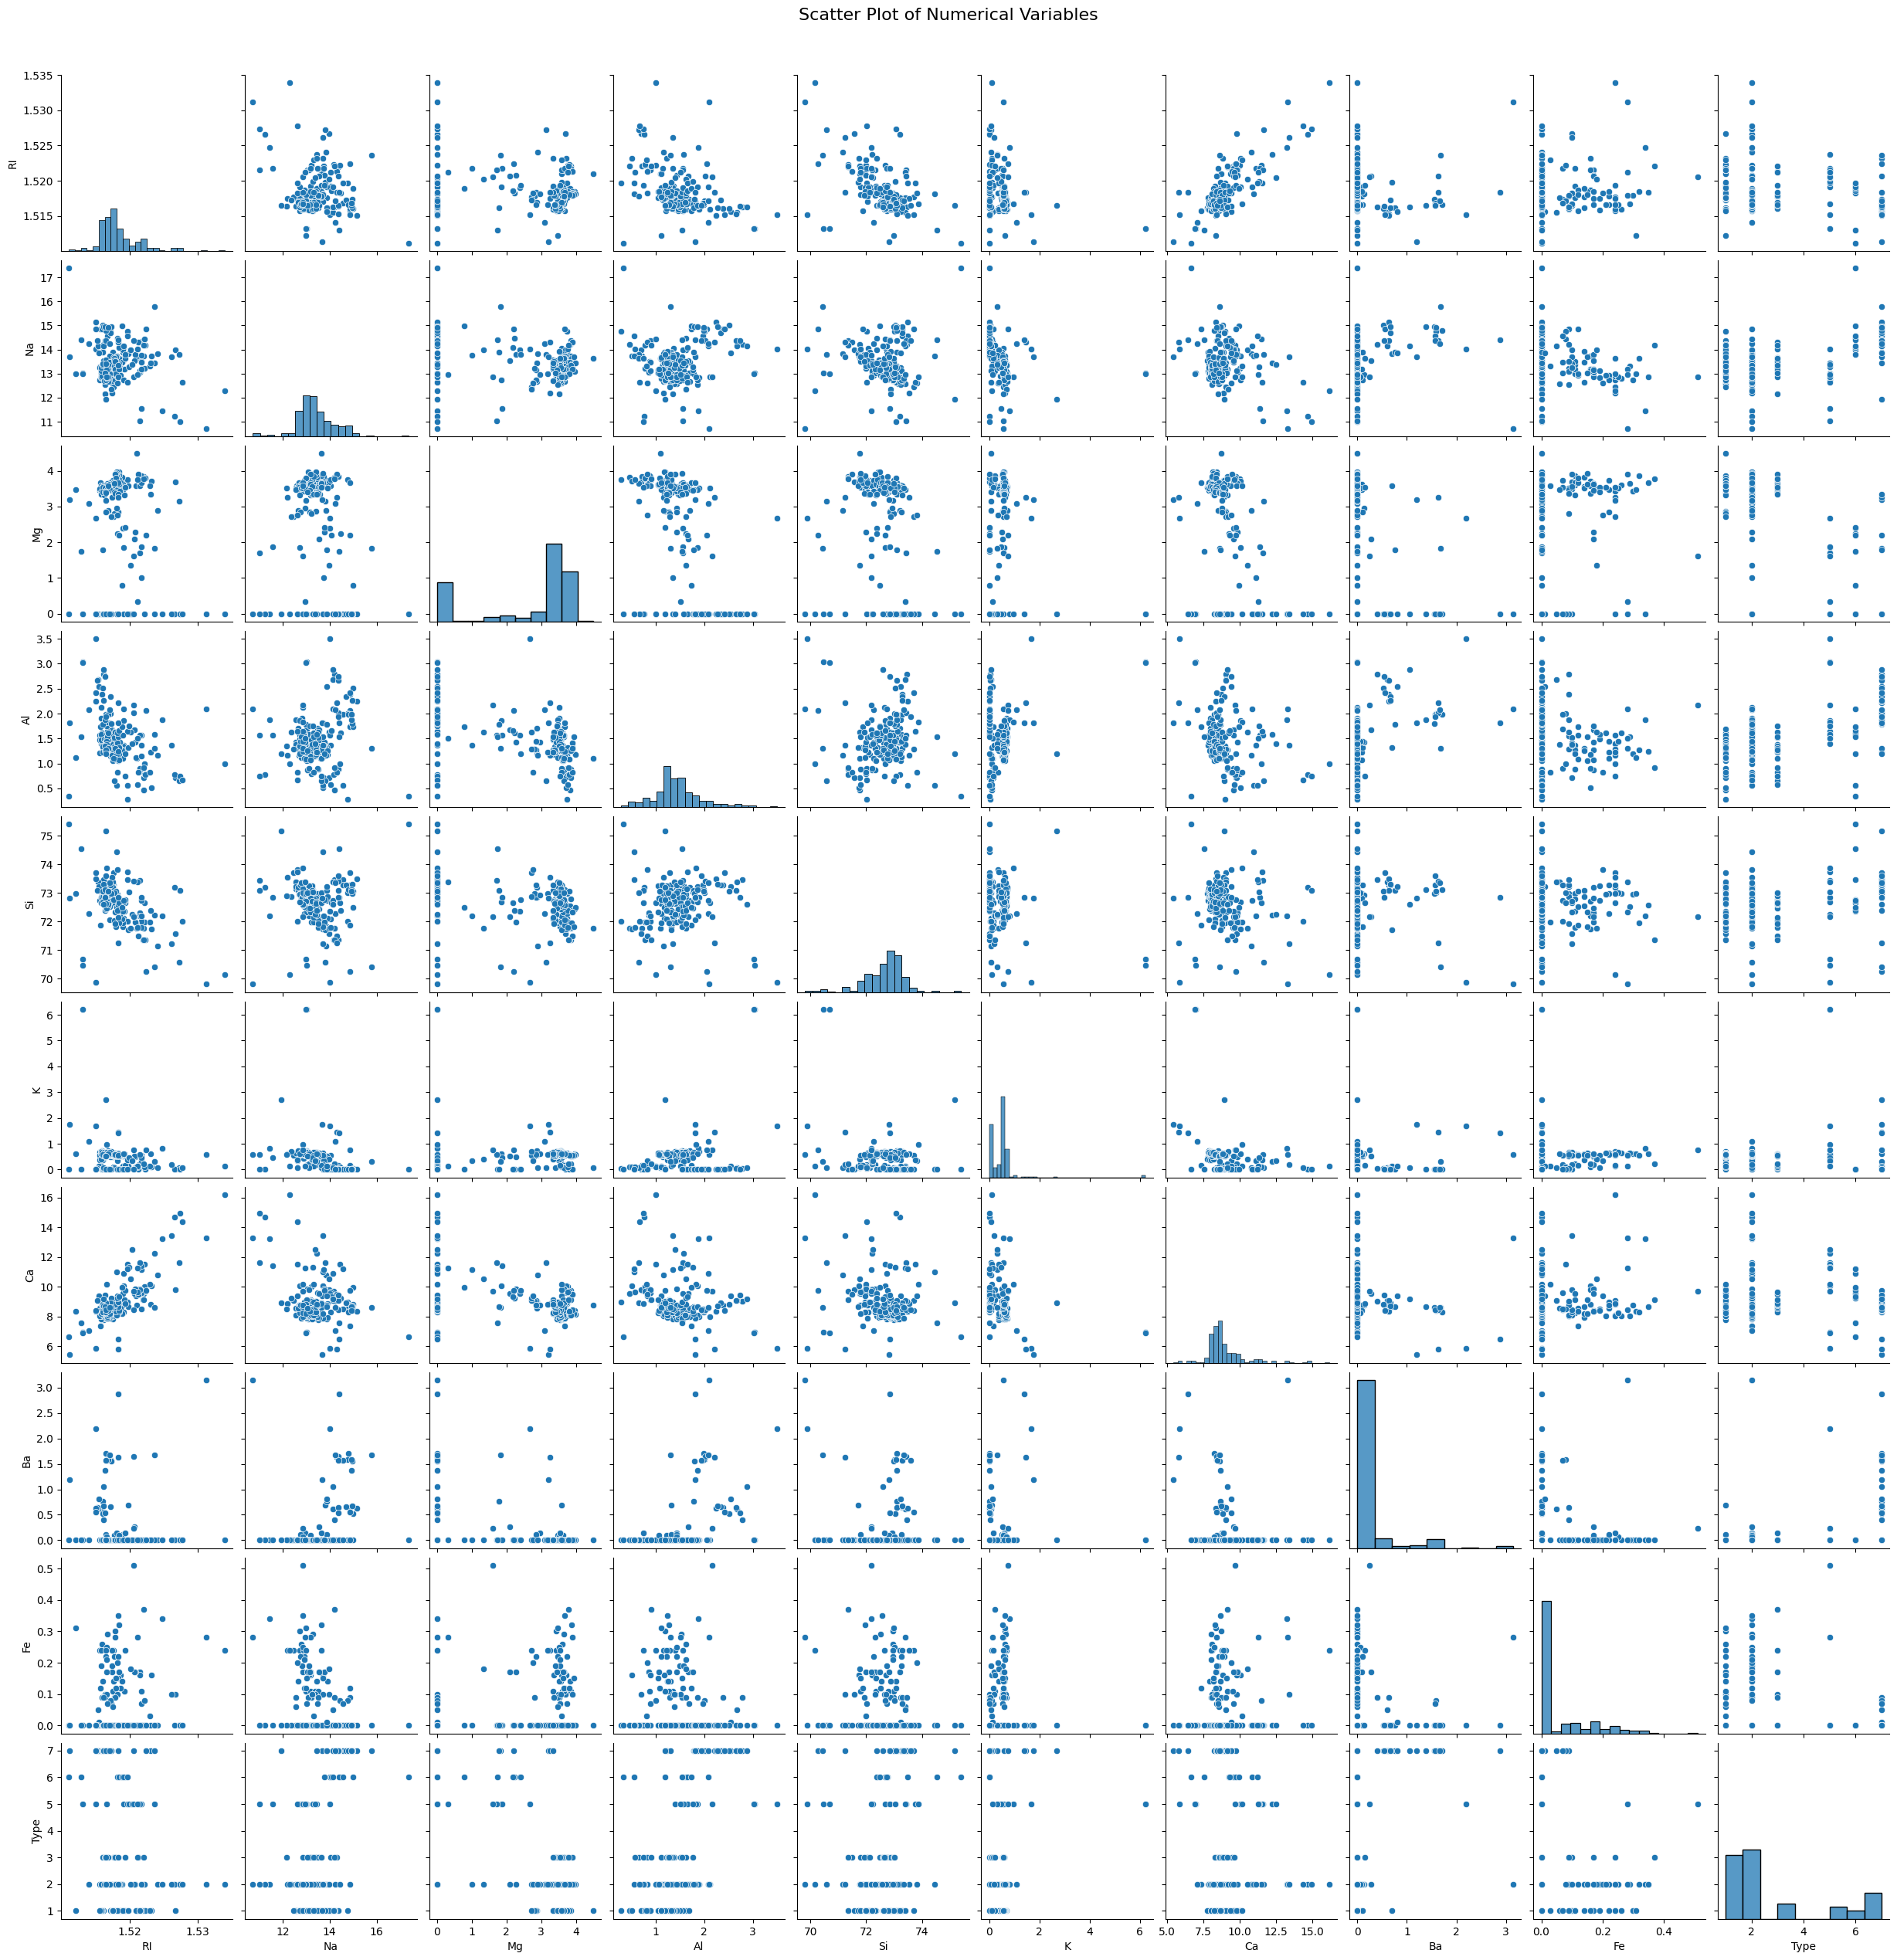

In [ ]:
#Scatter plotting the numerical variables
plt.figure(figsize=(16,12))
sns.pairplot(df)
plt.suptitle('Scatter Plot of Numerical Variables', y=1.02,fontsize ='16')
plt.show()

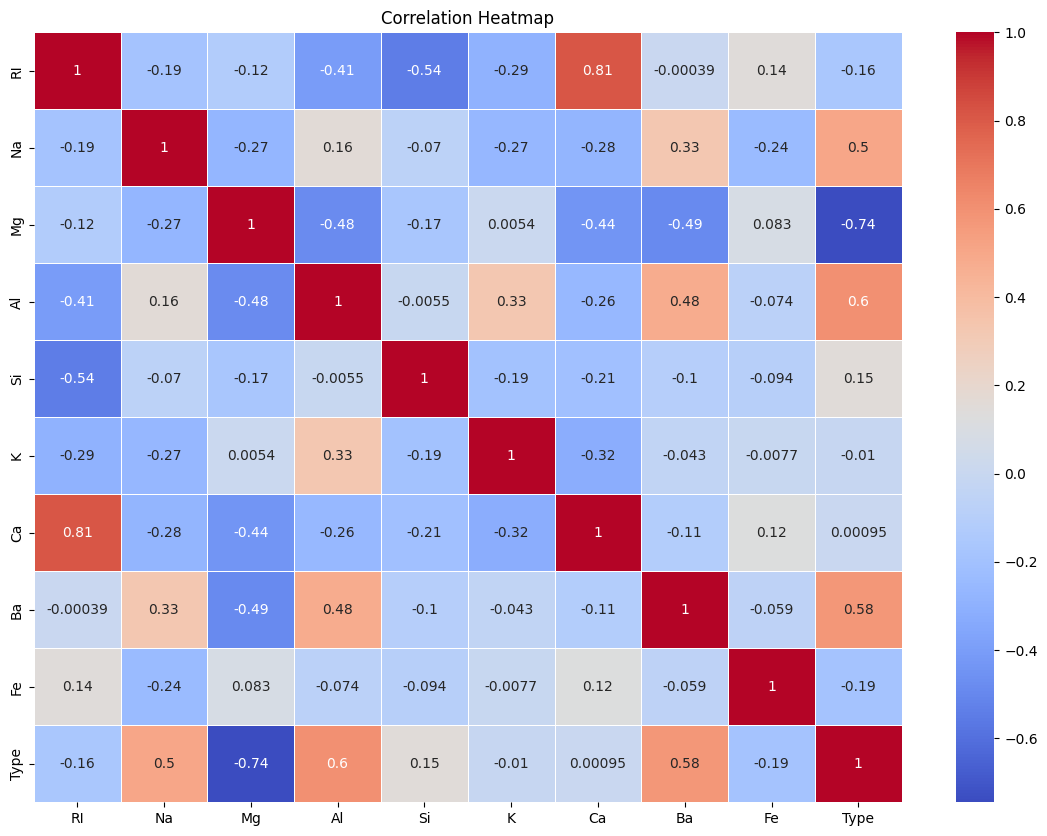

In [ ]:
#Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **Insights And Patterns**

**<u>From Histograms:-</u>**

- Refractive Index shows a normal-like distribution with almost a moderate right skewness. Most values lie within a narrow range.
- Sodium component appears to be approximately normal with some outliers at the higher end.
- Magnesium has a bi-modal distribution with a significant number of zero values.
- Aluminum component shows right-skewness, with most values concentrated between 1 and 2.
- Silicon component appears like almost normal distribution but slightly skewed.
- Potassium is highly skewed with many zero values and some extreme outliers.
- calcium component shows a broad spread, slightly skewed.
- Most values of both barium and iron components are zero, indicating they may not be highly relevant to the classification unless they are key differentiators.

**<u>From Boxplot(Identifying Outliers)</u>**
- There are some significant outliers in RI, Na, Al, Si, K, Ca, Ba, and Fe.
- Both K and Mg have extreme values, suggesting the need for careful handling (such as log transformation or capping).
- Ba and Fe have many zero values, suggesting a strong possibility of categorical influence or specific glass types.

**<u>From Pairplot & Scatter Analysis(Correlation Between Features)</u>**

- RI vs Si(-0.54) - Higher silicon content may lowers the refractive index.
- Mg vs Type(-0.74) - Different glass types of glasses are defined by Mg content.
- Ca vs RI(0.81) - Higher calcium content leads to a higher refractive index.
- Al vs Ba (0.48) - Possible interaction in specific glass compositions.
- Ba vs Type (0.58) - Suggests Ba is a major factor in differentiating glass types.
- RI & Ca (0.81 correlation): Calcium content is a strong determinant of refractive index.
- Mg & Type (-0.74 correlation): Suggests that some glass types are characterized by low Mg content.
- Ba & Type (0.58 correlation): Indicates that Ba levels may be a key identifier for certain glass categories.
- Al & Type (0.33 correlation): Some differentiation is possible based on aluminum content.

## **Data Preprocessing**

### **Handling Missing Values**

In [ ]:
#Ensuring if there are missing values
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


> There are no missing values in the data set  but it is possible that they were taken as zeros. since we've observed some in variables like Barium,potassium and iron.



### **Handling Outliers**

In [ ]:
#Creating a function to detect outliers using IQR
outlier_features = ['RI', 'Al', 'Si', 'Ca']
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

#Detecting outliers for selected features
outliers_dict = {feature: detect_outliers_iqr(df, feature) for feature in outlier_features}

#Printing outlier counts
for feature, outliers in outliers_dict.items():
    print(f"{feature}: {len(outliers)} outliers detected")


RI: 17 outliers detected
Al: 18 outliers detected
Si: 12 outliers detected
Ca: 26 outliers detected


In [ ]:
#Treating outliers
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = df[feature].apply(lambda x: min(max(x,lower_bound),upper_bound))

for feature in outlier_features:
    cap_outliers(df, feature)

print("Outliers have been capped")

Outliers have been capped


In [ ]:
#But some variables have zero values
zero_counts = (df == 0).sum()

#Displaying only columns with zero values
zero_counts[zero_counts > 0]


,0
Mg,42
K,30
Ba,176
Fe,144


In [ ]:
#Replacing low zero value features with median and high zero value features with mean
df[['Mg','K']] = df[['Mg','K']].replace(0,df[['Mg','K']].median())
df[['Ba','Fe']] = df[['Ba','Fe']].replace(0,df[['Ba','Fe']].mean())

### **Scaling**

In [ ]:
#Scaling the data to improve comparability
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

#Appplying different scalings for different distributions types
df[['RI', 'Na', 'Al', 'Si']] = std_scaler.fit_transform(df[['RI', 'Na', 'Al', 'Si']])
df[['K', 'Ca', 'Ba', 'Fe']] = min_max_scaler.fit_transform(df[['K', 'Ca', 'Ba', 'Fe']])
df[['Mg', 'Ba', 'K']] = robust_scaler.fit_transform(df[['Mg', 'Ba', 'K']])

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.201497,0.284953,6.412698,-0.757758,-1.353189,-3.618182,0.511729,0.0,0.094019,1
1,-0.234269,0.591817,0.761905,-0.143604,0.092935,-0.563636,0.265080,0.0,0.094019,1
2,-0.838135,0.149933,0.444444,0.281579,0.488716,-1.218182,0.251676,0.0,0.094019,1
3,-0.213155,-0.242853,1.333333,-0.308954,-0.089734,0.090909,0.369638,0.0,0.094019,1
4,-0.314503,-0.169205,0.888889,-0.427060,0.625717,-0.054545,0.329424,0.0,0.094019,1


## **Random Forest Model**

In [ ]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('Type',axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Initializing Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Training the model
rf_model.fit(X_train, y_train)

#Predicting on test set
y_pred = rf_model.predict(X_test)

#Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7674418604651163

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.71      0.67      0.69        15
           3       1.00      1.00      1.00         3
           5       0.50      0.67      0.57         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.77        43
   macro avg       0.81      0.75      0.76        43
weighted avg       0.78      0.77      0.77        43


Confusion Matrix:
 [[12  2  0  0  0  0]
 [ 3 10  0  1  0  1]
 [ 0  0  3  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  1  0  5]]


### **Bagging and Boosting Methods**

In [ ]:
#Appplying Bagging and boosting methods
from sklearn.ensemble import BaggingClassifier

#Initializing Bagging with Random Forest as base estimator
bagg_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                  n_estimators=10, random_state=42)

#Training the model on train test
bagg_model.fit(X_train, y_train)

#Predictioning on test set
y_pred_bagg = bagg_model.predict(X_test)

#Evaluating the model performance
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bagg))


Bagging Accuracy: 0.7906976744186046

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.73      0.73      0.73        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       0.86      1.00      0.92         6

    accuracy                           0.79        43
   macro avg       0.84      0.74      0.77        43
weighted avg       0.80      0.79      0.79        43


Confusion Matrix:
 [[12  2  0  0  0  0]
 [ 2 11  0  1  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  6]]


In [ ]:
#Applying boosting
from sklearn.ensemble import AdaBoostClassifier

#Initializing AdaBoost with Random Forest as base estimator
ada_model = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                                            n_estimators=10, random_state=42)

ada_model.fit(X_train, y_train)

#Predicting on test set
y_pred_ada = ada_model.predict(X_test)

#Evaluating the model performance
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8372093023255814

Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 2 11  0  1  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.84        43
   macro avg       0.86      0.83      0.84        43
weighted avg       0.84      0.84      0.83        43



#### **Comparing Models Performances**

**<u>Random Forest</u>**

|Accuracy|Ma.avg.Precision|Ma.avg.Recall|Ma.avg.F1-score|
|:-------|:---------------|:------------|:--------------|
|   0.767|            0.81|         0.75|           0.76|

- Random forest model performed very good considering the results even though some of them are misclassified.
- Especially classes like 2,5 and 6 this might be improve with different models

**<u>Bagging Model</u>**

|Accuracy|Ma.avg.Precision|Ma.avg.Recall|Ma.avg.F1-score|
|:-------|:---------------|:------------|:--------------|
|0.791|0.84|0.74|0.77|

- Bagging Model even better than Random forest model considering the increase in accuracy,precision and F1 score except recall which is slightly lowered.
- But it's still misclassified some of them ,we can only say that it perfoms better than random forest in clssifiying certaing types.

**<u>Boosting Model(AdaBoost)</u>**

|Accuracy|Ma.avg.Precision|Ma.avg.Recall|Ma.avg.F1-score|
|:-------|:---------------|:------------|:--------------|
|0.837	|0.86	|0.83	|0.84|

- Boosting model(AdaBoost) performed the best among the models with 83.7% accuracy, higher recall,balanced precision and better F1 score.
- It is best in classifying most of the types especially 1,6 and 7 the model performance drops only in classifying 3 and 5.

### **Interview Questions**

> 1. Explain Bagging and Boosting methods. How are they different from each other?

**=> <u>Bagging (Bootstrap Aggregating)</u>**

- Bagging is an ensemble technique that trains multiple models independently on different random subsets (bootstrapped samples) of the dataset.
- Each model makes different predictions, and the final prediction is obtained through majority voting (for classification) or averaging (for regression).
- The most common example of Bagging is the Random Forest algorithm.

 > **Main Features**

  - Model reduces variance and prevents from overfitting.
  - Works well for high-variance models (such as Decision Trees).
  - Models are trained independently.

**=> <u>Boosting</u>**
- Boosting is also an ensemble technique that trains models one after another in order by correcting on new model from previous model.
- Weights are assigned to training samples, and in every new model misclassified samples get higher weights in the next iteration.
- The final prediction is a weighted combination of all models.

 > **Main Features**

 - Reduces bias and improves model performance.
 - Only focuses on hard-to-classify samples.
 - Works well for weak learners (e.g., shallow Decision Trees).
 - Exs: AdaBoost, Gradient Boosting, XGBoost, LightGBM.

**=> <u>Difference Between Bagging and Boosting</u>**

|Feature	|Bagging	|Boosting|
|:--------|:--------|:-------|
|Training Process|Models train independently in parallel|Models train sequentially by correcting previous errors|
|Purpose|Reduces variance, prevents from overfitting|Reduces bias, improves weak learners|
|Focus|Gives equal importance to all samples|Focuses more on misclassified samples|
|Examples Algorithms|Random Forest|	AdaBoost, Gradient Boosting, XGBoost|

> 2. How to Handle Imbalance in data?

Data imbalance happens when one class has significantly more values or instances than others. This can lead to biased predictions.

**<u>Techniques to Handle Imbalance</u>**

**=> Resampling Techniques**

- Oversampling (SMOTE, Random OverSampling)- Increase the number of minority class samples by duplication or synthetic data generation.
- Undersampling - By reduce the majority class samples to balance the dataset.

**=> Using Class Weights**

- Assigning higher weights to the minority class during training for instance class_weight='balanced' in sklearn.

**=> Use Different Evaluation Metrics**

- Accuracy of a model always misleads in imbalanced datasets. Instead,
 use:
     - Precision-Recall (PR) Curve
     - F1-Score (an harmonic mean of precision & recall)
     - ROC-AUC Score

**=> Use Specialized Algorithms**

- For tree-based models like XGBoost, LightGBM handle imbalance better when using built-in class weighting.

**=> Data Augmentation (For Image/Text Data)**

 - Generate synthetic samples using augmentation techniques such as rotation, flipping for images, or back-translation for text.